# Using YT with Athena++ Data

## Loading Data

While the initial data importing applies to Athena++ HDF5 data in particular, the plotting segments are useful for other data sets imported with YT. 

First, we load in some libraries. The matplotlib libraries are brought in for comparison to YT plots. Glob is for loading in a particular folder of files. 

In [49]:
# Matplotlib plotting modules
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

##numpy and file editing
import numpy as np
import glob

# Problem/physics modules
import units_Parker

##YT modules
import yt
from yt.visualization.api import Streamlines
import yt.units as u

Next, we load in the data from a simulation. Path is the location of data for a bunch of problems. Prob is related to the specific problem generator used and run is a folder within that problem folder. The run folder should have all the data files. The directories should look like so:

- `path`
    - `prob`
        - `run`
          - `outfileNom.out1.00000.athdf`
          - `outfileNom.out1.00001.athdf`
          - .......
          
The code block below creates a list `dsLst` of datasets, ordered by time step.

In [50]:

path   = '/Users/user/Documents/data/'
prob   = 'Parker'
outfileNom = "parker"
run = "testAW"
suffix = 'athdf'
out = 1


myUnits = units_Parker.Parker()

#def _pres(field, data):
#    print(data['press'])
#    return data['press']
#yt.add_field(("gas","pressure"), function=_pres)

bs = np.sqrt(myUnits.es)
units= {"length_unit":(10.0,'pc'),
                  "time_unit":(10.0,'yr'),
                  "mass_unit":(1e-24,'g')}
                  #"magnetic_unit":(bs.value,str(bs.unit))}
fileNam = ("%s%s/%s/%s.out%1i*.%s") % (path, prob, run,
                                            outfileNom,out,suffix)

fileLst = glob.glob(fileNam)

fileLst = np.sort(fileLst)
dsLst = []
for file in fileLst:
    ds = yt.load(file,units_override=units)
    dsLst.append(ds)




YTRegion (parker.out1.00001): , center=[2. 2. 0.] code_length, left_edge=[ 0.  0. -1.] code_length, right_edge=[4. 4. 1.] code_length



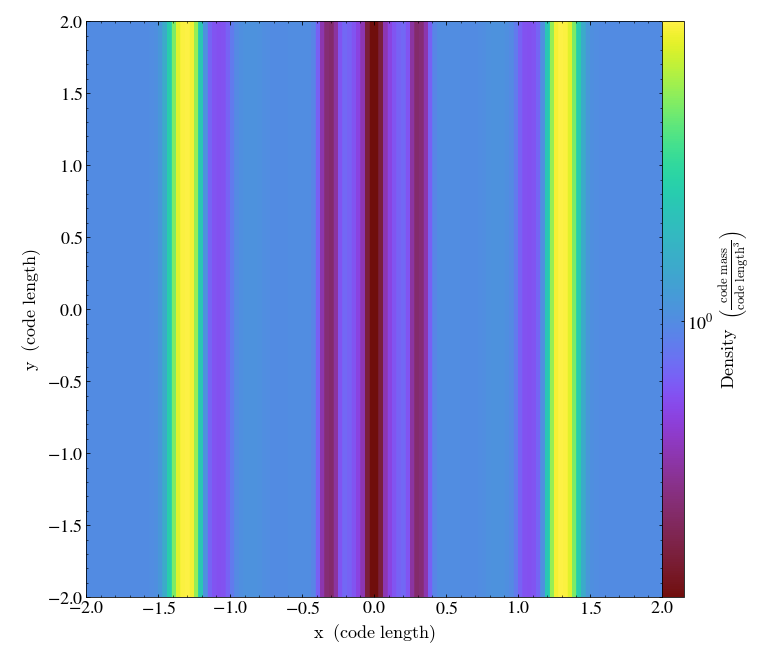

In [48]:
quant = ("gas","density")
print(dsLst[1].all_data())
    
slc = yt.SlicePlot(dsLst[10],'z',quant) #,center='c')
#slc.set_log(quant, True)
slc.show()

In [ ]:
yt.LinePlot(ds,[('density'),('Bcc2')],(0,0,-1),(4,0,-1),1000)

In [ ]:
d= 10

infile = (("%s%s/%s/%s.out%1i.%05i.%s") % (path, prob, run,
                                            outfileNom,out,d,suffix))

ds = yt.load(infile, units_override=units_override)
Y = np.linspace(0,4,20)
pos = np.array([[Y],[Y*0+4.0],[Y*0]])

streamlines = Streamlines(
        ds,pos, 'velocity_x', 'velocity_y', length=1.0)
#streamlines.integrate_through_volume()
spp = yt.PhasePlot(ds, "Bcc2", "density",'vel1')
spp.set_log('vel1', False)